In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import pandas as pd

In [2]:
df = pd.read_excel('salary_data.xlsx')
data = df[['DECISION_DATE', 'PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_PER_YEAR', 'PREVAILING_WAGE_PER_YEAR', 'VISA_CLASS', 'JOB_TITLE_SUBGROUP']].copy()
data.fillna(0)
data = data
new_data = data.dropna(axis = 0, how ='any') 
col='DECISION_DATE'
new_data[col] = pd.to_datetime(new_data[col], format='%m/%d/%Y')
new_data.set_index('DECISION_DATE', inplace=True)
new_data.head(10)


C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,PAID_WAGE_PER_YEAR,PREVAILING_WAGE_PER_YEAR,VISA_CLASS,JOB_TITLE_SUBGROUP
DECISION_DATE,,,,,,
2013-04-29,320000.00,325000.00,325000.00,320000.0,H-1B,assistant professor
2013-08-21,289798.00,352000.00,352000.00,289798.0,H-1B,assistant professor
2013-08-07,283628.00,352000.00,352000.00,283628.0,H-1B,assistant professor
2013-08-12,283628.00,352000.00,352000.00,283628.0,H-1B,assistant professor
2015-02-27,260000.00,260000.00,260000.00,260000.0,H-1B,assistant professor
2014-04-28,120.50,324.07,303329.52,250640.0,H-1B,assistant professor
2013-07-03,120.50,149.39,139829.04,250640.0,H-1B,assistant professor
2013-11-27,120.50,120.50,112788.00,250640.0,E-3 Australian,assistant professor
2015-03-05,117.42,127.40,264992.00,244233.6,H-1B,business analyst


In [3]:
new_data = new_data.copy()
new_data.VISA_CLASS[new_data.VISA_CLASS == "H-1B"] = 1
new_data.VISA_CLASS[new_data.VISA_CLASS == "greencard"] = 2
new_data.VISA_CLASS[new_data.VISA_CLASS == "E-3 Australian"] = 3
new_data.VISA_CLASS[new_data.VISA_CLASS == "H-1B1 Singapore"] = 4
new_data.VISA_CLASS[new_data.VISA_CLASS == "H-1B1 Chile"] = 5

new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "software engineer"] = 1
new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "assistant professor"] = 2
new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "teacher"] = 3
new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "business analyst"] = 4
new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "management consultant"] = 5
new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "data analyst"] = 6
new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "attorney"] = 7
new_data.JOB_TITLE_SUBGROUP[new_data.JOB_TITLE_SUBGROUP == "data scientist"] = 8


C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\FinTech\Anacon

In [4]:
new_data.head()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,PAID_WAGE_PER_YEAR,PREVAILING_WAGE_PER_YEAR,VISA_CLASS,JOB_TITLE_SUBGROUP
DECISION_DATE,,,,,,
2013-04-29,320000.0,325000.0,325000.0,320000.0,1,2
2013-08-21,289798.0,352000.0,352000.0,289798.0,1,2
2013-08-07,283628.0,352000.0,352000.0,283628.0,1,2
2013-08-12,283628.0,352000.0,352000.0,283628.0,1,2
2015-02-27,260000.0,260000.0,260000.0,260000.0,1,2


In [5]:
X = new_data[['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'PREVAILING_WAGE_PER_YEAR', 'VISA_CLASS', 'JOB_TITLE_SUBGROUP']].copy()
y = new_data[['PAID_WAGE_PER_YEAR']].copy() 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

linreg = LinearRegression()
linreg.fit(X_train, y_train)
print("R-квадрат обучение: 􏰒: {:.2f}".format(linreg.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(linreg.score(X_test, y_test)))
print("-------------------------------")
print("linreg.coef_: {}".format( linreg.coef_ )) 
print("linreg.intercept_: {}".format( linreg.intercept_  ))

R-квадрат обучение: 􏰒: 0.93
R-квадрат тест: 0.91
-------------------------------
linreg.coef_: [[ -1.10320537   0.99080415   1.10971895 361.40250215 120.99298478]]
linreg.intercept_: [-189.45641283]


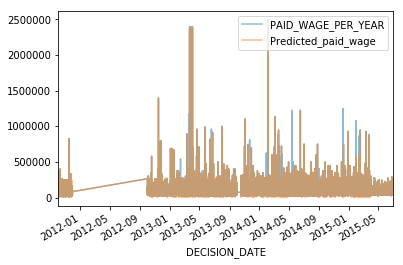

In [25]:
model = LinearRegression()
model.fit(X, y)
new_data['Predicted_paid_wage'] = model.predict(X)
new_data1 = new_data[['PAID_WAGE_PER_YEAR', 'Predicted_paid_wage']]

new_data2 = new_data1.plot(alpha=0.5)

In [31]:
big_data = pd.concat([new_data1, X], axis=1)

big_data = big_data.copy()
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 1] = "software engineer"
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 2] = "assistant professor"
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 3] = "teacher"
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 4] = "business analyst"
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 5] = "management consultant"
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 6] = "data analyst"
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 7] = "attorney"
big_data.JOB_TITLE_SUBGROUP[big_data.JOB_TITLE_SUBGROUP == 8] = "data scientist"
big_data.tail()

export_csv = big_data.to_excel (r"C:\\muse\\new_predicted__salary.xlsx")

C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\FinTech\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A va

In [23]:
new_data2.figure.savefig('pic.png')

In [24]:
new_data1.head(10)

,PAID_WAGE_PER_YEAR,Predicted_paid_wage
DECISION_DATE,,
2014-08-13,116000.0,115987.989296
2015-06-03,115794.0,116138.370543
2014-10-16,115794.0,115784.115546
2015-03-24,115794.0,115784.115546
2014-09-18,115794.0,115784.115546
2014-11-20,124800.0,128458.850454
2014-11-03,115790.0,116134.382651
2015-03-12,150000.0,149636.901582
2015-03-04,140000.0,139740.117619


In [14]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
linreg_1 = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Ridge() 
                         )
linreg_1.fit(X_train, y_train)
print("R-квадрат обучение: {:.2f}".format(linreg_1.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(linreg_1.score(X_test, y_test)))

C:\Users\FinTech\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


R-квадрат обучение: 0.92
R-квадрат тест: 0.91
